# MF2 TESTING

In [1]:
import sandy
import matplotlib.pyplot as plt

## LRU=0  (Thorium 233 in jeff 3.3)

In [2]:
tape = sandy.get_endf6_file("jeff_33", "xs", 902330)

In [3]:
dic = sandy.read_mf2(tape,tape.mat[0])
print(dic)

{'MAT': 9043, 'MF': 2, 'MT': 151, 'ZA': 90233.0, 'AWR': 231.04, 'NIS': {90233: {'ABN': 1.0, 'LFW': 0, 'NER': {(1e-05, 1.9): {'LRU': 0, 'LRF': 0, 'NRO': 0, 'NAPS': 0, 'SPI': 0.5, 'AP': 0.9765}}}}}


In [4]:
tab = sandy.write_mf2(dic)
print(tab)

 90233.0000 231.040000          0          0          1          09043 2151    1
 90233.0000 1.00000000          0          0          1          09043 2151    2
 1.000000-5 1.90000000          0          0          0          09043 2151    3
 5.000000-1 9.765000-1          0          0          0          09043 2151    4


## LRU = 1 

### LRF = 1 or LRF = 2 (Thorium 230 in jeff 3.3)

In [5]:
tape = sandy.get_endf6_file("jeff_33", "xs", 902300)

In [6]:
dic = sandy.read_mf2(tape,tape.mat[0])

In [7]:
tab = sandy.write_mf2(dic)

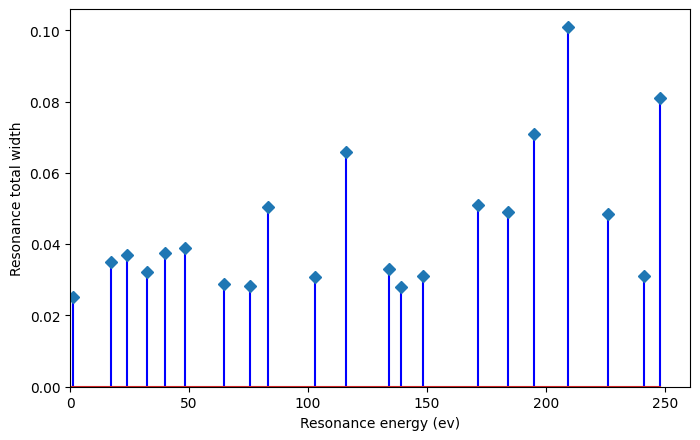

In [8]:
fig, ax = plt.subplots(figsize=(8, 5),dpi = 100)
x = []
y = []
L = dic['NIS'][90230]['NER'][(1e-05, 251.0)]["L"]
for i in L.keys():
    for j in range(len(L[i]["RES_PAR"])):
        x.append(L[i]["RES_PAR"][j]["ER"])
        y.append(L[i]["RES_PAR"][j]["GT"])
ax = plt.stem(x, y, linefmt='blue', markerfmt='D')
plt.xlabel('Resonance energy (ev)')
plt.ylabel('Resonance total width')
plt.xlim(0)
plt.ylim(0)
plt.show()

### LRF = 3  (Uranium 238 in Jeff 3.3)

In [9]:
tape = sandy.get_endf6_file("jeff_33", "xs", 922380)

In [10]:
dic = sandy.read_mf2(tape,tape.mat[0])

In [11]:
tab = sandy.write_mf2(dic)

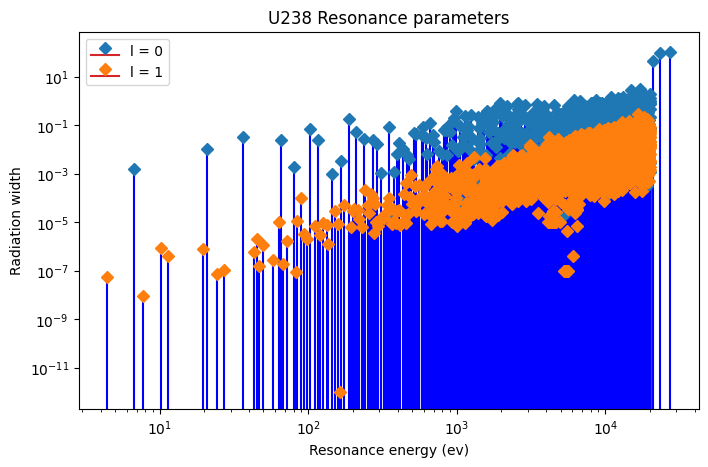

In [12]:
fig, ax = plt.subplots(figsize=(8, 5),dpi = 100)
L = dic["NIS"][92238]["NER"][(1e-05, 20000.0)]["L"]
for i in L.keys():
    x = []
    y = []
    for j in range(len(L[i]["RES_PAR"])):
        x.append(L[i]["RES_PAR"][j]["ER"])
        y.append(L[i]["RES_PAR"][j]["GN"])
    ax = plt.stem(x, y, label= f"l = {i}", linefmt='blue', markerfmt='D')
plt.xlabel('Resonance energy (ev)')
plt.ylabel('Radiation width')
plt.title('U238 Resonance parameters')

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

### LRF = 7  (Iron 54 in ENDF/B-VIII.0)

In [13]:
tape = sandy.get_endf6_file("endfb_80", "xs", 260540)

In [14]:
dic = sandy.read_mf2(tape,tape.mat[0])

In [15]:
dic['NIS'][26054]['NER'][(1e-05, 1036000.0)]['J'].keys()

dict_keys([(0.5, 0.0), (-0.5, 0.0), (-1.5, 0.0), (1.5, 0.0), (2.5, 0.0)])

In [16]:
tab = sandy.write_mf2(dic)

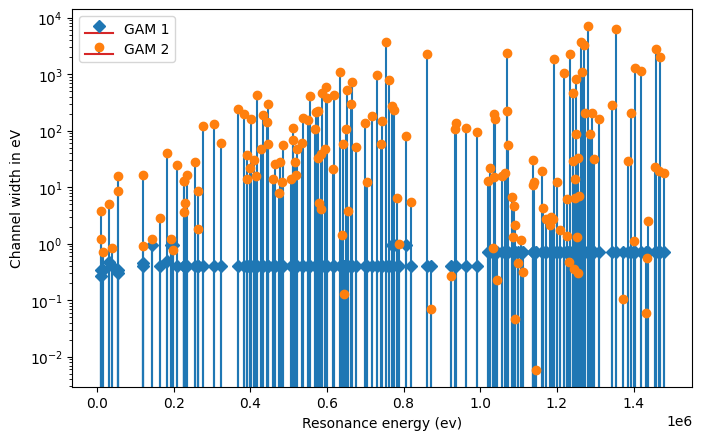

In [17]:
fig, ax = plt.subplots(figsize=(8, 5), dpi = 100)
x = []
y1 = []
y2 = []
J = dic['NIS'][26054]['NER'][(1e-05, 1036000.0)]['J'][(1.5, 0.0)]["RES_PAR"]
for k in range(len(J)):
    y1.append(J[k]["GAM"][0])
    y2.append(J[k]["GAM"][1])
    x.append(J[k]["ER"])
ax = plt.stem(x, y1, markerfmt='D', label = 'GAM 1')
ax = plt.stem(x, y2, markerfmt='o', label = 'GAM 2')
plt.xlabel('Resonance energy (ev)')
plt.ylabel('Channel width in eV')
plt.xscale("linear")
plt.yscale("log")
plt.legend()
plt.show()

## LRU = 2

### LFW = 0 and LRF = 1  (Iron 58 in ENDF/B-VIII.0)

In [18]:
tape = sandy.get_endf6_file("endfb_80", "xs", 260580)

In [19]:
dic = sandy.read_mf2(tape,tape.mat[0])

In [20]:
tab = sandy.write_mf2(dic)

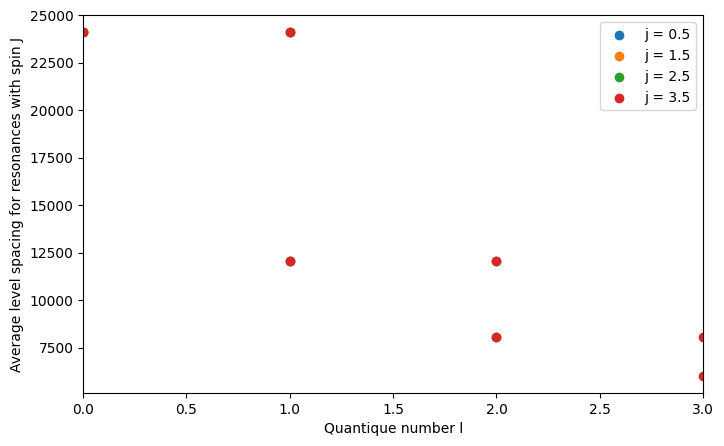

In [21]:
fig, ax = plt.subplots(figsize=(8, 5), dpi = 100)
x = []
y = []
L = dic['NIS'][26058]['NER'][(350000.0, 3000000.0)]["L"]
for i in L.keys():
    for j in range(len(L[i]["RES_PAR"])):
        y.append(L[i]["RES_PAR"][j]["D"])
    for k in range(len(L[i]["RES_PAR"])):
        x.append(i)
    ax = plt.scatter(x, y , label = f"j = {L[i]['RES_PAR'][j]['AJ']}" )
plt.xlabel('Quantique number l')
plt.ylabel('Average level spacing for resonances with spin J')
plt.xlim(0,3)
plt.legend()
plt.show()

### LRF = 2  (Uranium 238 in Jeff 3.3)

In [22]:
tape = sandy.get_endf6_file("jeff_33", "xs", 922350)

In [23]:
dic = sandy.read_mf2(tape,tape.mat[0])

In [24]:
tab = sandy.write_mf2(dic)

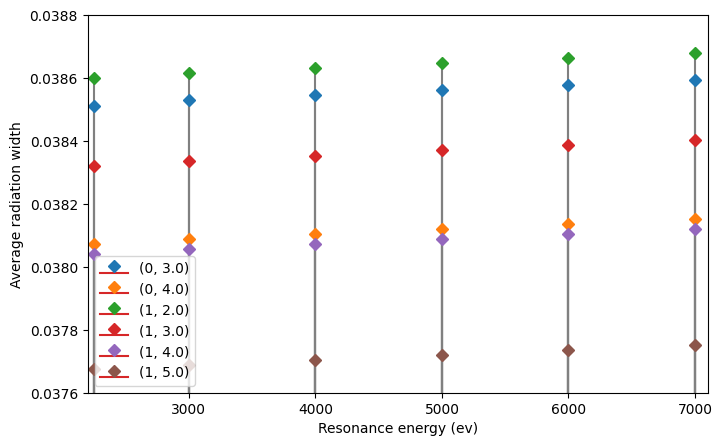

In [25]:
fig, ax = plt.subplots(figsize=(8, 5),dpi = 100)
L = dic["NIS"][92235]["NER"][(2250.0, 46200.0)]["L"]
for l in L.keys():
    for j in L[l]["J"].keys():
        x = []
        y = []
        for k in range(len(L[l]["J"][j])):
            x.append(L[l]["J"][j]["RES_PAR"][k]["ES"])
            y.append(L[l]["J"][j]["RES_PAR"][k]["GG"])
        ax = plt.stem(x, y, linefmt='grey', markerfmt='D', label=f"{l,j}")
        plt.xlabel('Resonance energy (ev)')
        plt.ylabel('Average radiation width')
        plt.xlim(2200, 7100)
        plt.ylim(0.0376, 0.0388)
        plt.legend()